#**<font color='red'><center><u>Sentiment Analysis on Movie Reviews - Batch 19</center>**

##**<font color='green'><center><u>Social media analytics project - CSE 234</center>**



##**<font color='blue'><u>Group Members: (7COM2) </center>**

*   Tanushree B S (Team lead) - 20191COM0241
*   Yenimetla Venkata Krishna Chaitanya - 20191COM0240
*   Lavanya S - 20191COM0114
*   Maka Srinivas - 20191COM0239
*   Maddula Venkata Sunil Kumar - 20191COM0117
*   Maddineni Baleeswar Chowdary - 20191COM0116

## **1. Load the libraries & Dataset**

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

Let's find out what are all the columns

In [3]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=50000, step=1)

In [5]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


The "review" column contains the textual information(input features) and the "sentiment" column contains the output labels. The task of any classifier is to correctly predict the "sentiment" given any "review" or textual column. Hence we have to apply our data cleaning, transformation steps to the "review" column.

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## **2. Dataset exploration & Statistical Analysis**

###**We will find the count of each type of sentiment in the dataset using seaborn library**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


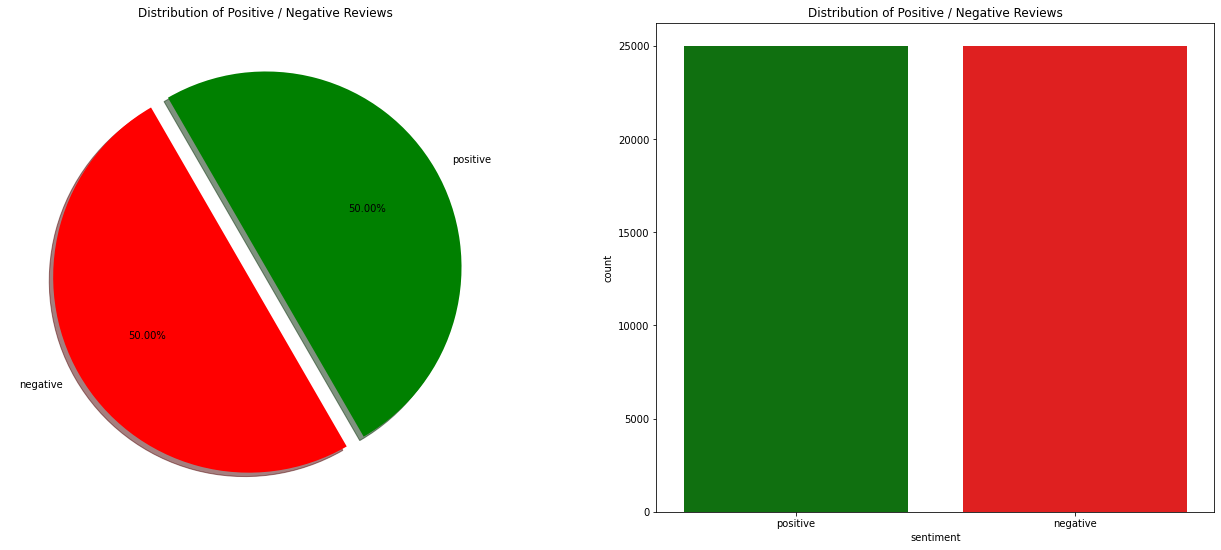

In [9]:
a, ax = plt.subplots(1,2, figsize = (22,9))
df["sentiment"].value_counts().plot.pie(explode= [0, 0.1], autopct = "%1.2f%%", 
                                        ax = ax[0], shadow = True, startangle = 300, 
                                        colors =["green", "red"] )
ax[0].set_title("Distribution of Positive / Negative Reviews")
ax[0].set_ylabel(' ')
sns.countplot("sentiment", data = df, ax=ax[1], palette=["green", "red"])
ax[1].set_title('Distribution of Positive / Negative Reviews')
plt.show()

###**Analyse the count of words in each segment- both positive and negative reviews**

Total Counts of both sets positive    25000
negative    25000
Name: sentiment, dtype: int64


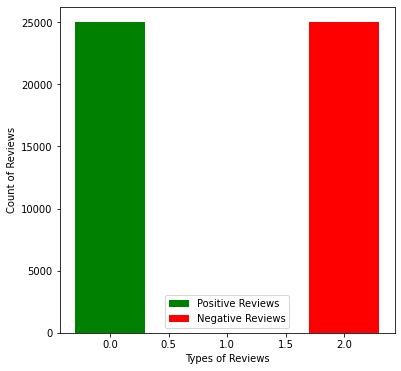

In [10]:
count=df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=df[df['sentiment']=='positive']
count_bad=df[df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

###**Analyse the count of words in each segment- both positive and negative reviews**

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


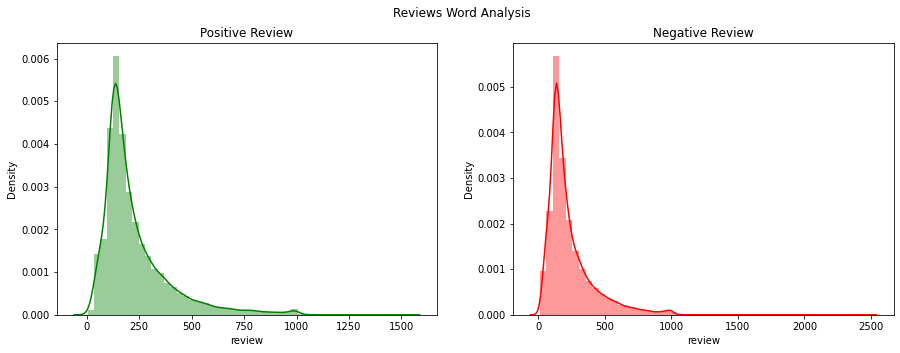

In [11]:
def c_w(data):
  return len(data)

def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
  sns.distplot(count_zeros,ax=ax1,color='Green')
  ax1.set_title(title_1)
  sns.distplot(count_ones,ax=ax2,color='Red')
  ax2.set_title(title_2)
  fig.suptitle(subtitle)
  plt.show()

count_good_words=count_good['review'].str.split().apply(lambda z:c_w(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:c_w(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review",
           "Reviews Word Analysis")

###**Number of Stop Words vs Number of MeaningFull Words**

In [12]:
import nltk

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [16]:
from nltk.tokenize import word_tokenize
stop_words_corpus = []
meaning_words = []
for i in df['review']:
    tokens = word_tokenize(i)
    for j in tokens:
        if j.lower() in stop_words:
            stop_words_corpus.append(j.lower())
        else:
            meaning_words.append(j.lower())

In [17]:
len(stop_words_corpus), len(meaning_words)

(5508350, 8465757)

**Inferences:**

1.There are total 13,974,107 words in the whole corpus.

2.From total words there are 5508350 stop words and 8465757 other meaningful words.

3.From Analysis we can see that there are 39.41 % stop words in the whole corpus and it didnt add some value to our model.

4.We will remove these words from the data and it will also help us to reduce the dimension of the model and increase the speed of the system.


###**Check the high frequency stop words in the data**

In [18]:
from collections import Counter
stopwords_freq = Counter(stop_words_corpus)

1.convert counter to dataframe

2.sort the values

In [19]:
df_stopwords_count = pd.DataFrame(stopwords_freq.items(), columns=['StopWords', 'Counts'])
df_stopwords_count = df_stopwords_count.sort_values(['Counts'], ascending=False)

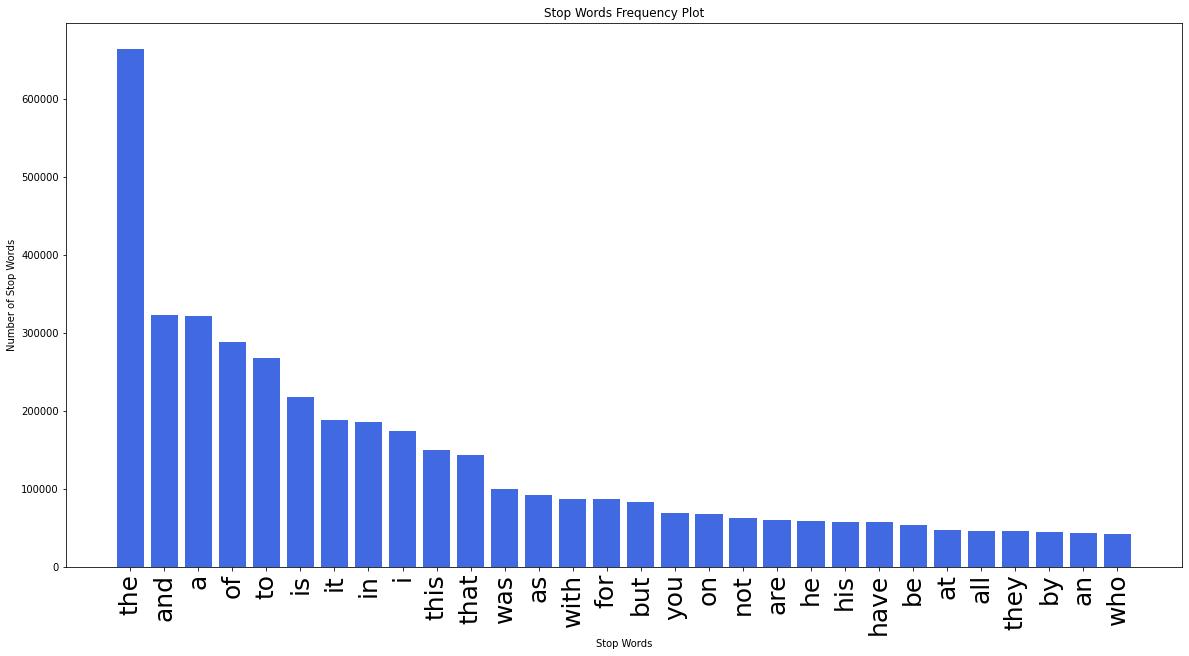

In [20]:
plt.figure(figsize=(20,10))
 
# creating the bar plot
plt.bar(df_stopwords_count['StopWords'][:30], df_stopwords_count['Counts'][:30], color ='royalblue',
        width = 0.8)
 
plt.xlabel("Stop Words")
plt.xticks(rotation=90, size = 25)

plt.ylabel("Number of Stop Words")
plt.title("Stop Words Frequency Plot")
plt.show()

1.From Plot we can see Top 30 Stop Words with High Frequency.

2.We can see that "the" and "and" are the most used stopwords in the data.

###**Analyse Stopwords**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


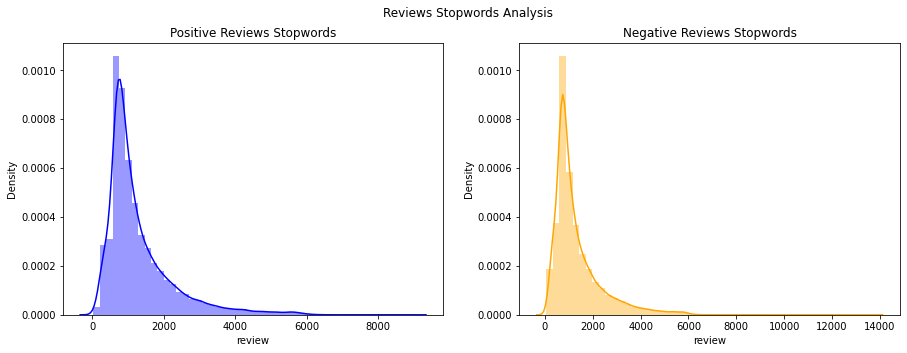

In [21]:
def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    

stops=set(stopwords.words('english'))
count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

###**Checking number of Urls**

In [22]:
count_good_urls=count_good['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w or 'HTTP' in w]))
count_bad_urls=count_bad['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w or 'HTTP' in w]))
#print(count_good_urls)
#print(count_bad_urls)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


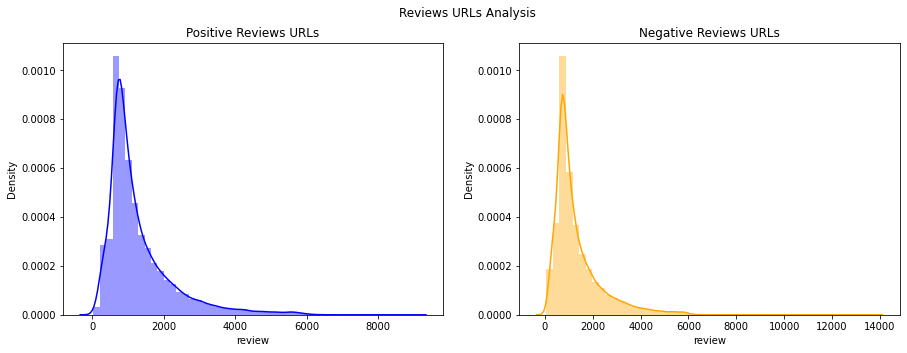

In [23]:
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

###**Most occuring words in postive and Negative Sentiments by using WordCloud**

In [24]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

####**(A) for positive reviews**

In [25]:
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['review'].str.cat(sep=" "))

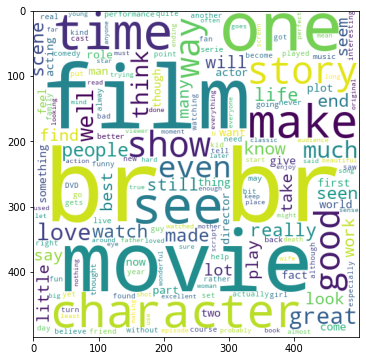

In [26]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

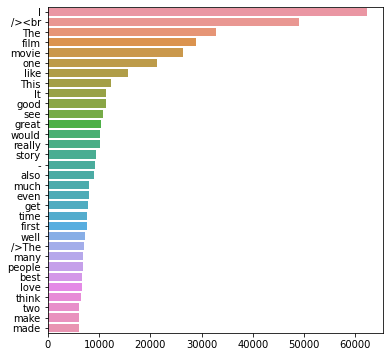

In [27]:
def create_corpus(word):
    corpus=[]
    
    for x in df[df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

####**(b) for negative reviews**

In [28]:
negative_wc = wc.generate(df[df['sentiment'] == 'negative']['review'].str.cat(sep=" "))

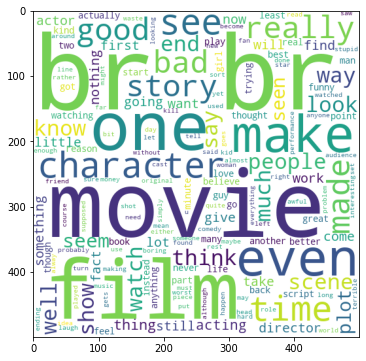

In [29]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

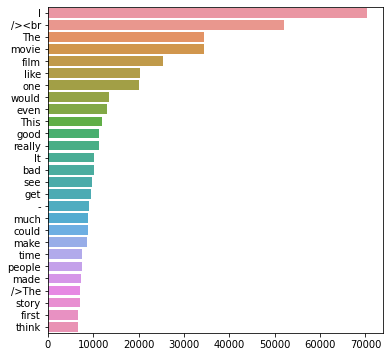

In [30]:
def create_corpus(word):
    corpus=[]
    
    for x in df[df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('negative')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [31]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## **3. Data Cleaning Process**

###**Removing html strips and noise text(remove spaces between brackets)**

In [32]:
from bs4 import BeautifulSoup
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

In [33]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


###**Removing special characters**

In [34]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [35]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


###**Removing URL data**

In [36]:
#Removes URL data
def remove_url(text):
    return re.sub('https://\S+|www\.\S+', '', text)
df['review']=df['review'].apply(remove_url)

In [37]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


###**Removing emoji data**

In [38]:
#Removes Emojis
def remove_emoji(text):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text=emoji_clean.sub(r'',text)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r'',text)
    return text
  
df['review']=df['review'].apply(remove_emoji)

In [39]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


###**Spliting the training dataset**

In [40]:
#split the dataset  

#train dataset
train_reviews=df.review[:40000]
train_sentiments=df.sentiment[:40000]

#test dataset
test_reviews=df.review[40000:]
test_sentiments=df.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


##**4. Text tokenization**

###**Text normalization**

In [41]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

###**Text stemming**

In [42]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

###**Removing stopwords**



In [43]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'been', 'doesn', 'whom', 'nor', "wouldn't", 'was', 'by', 'then', 'has', 'about', 'ain', "hadn't", "you've", 'between', 'o', 'haven', 'with', 'him', 'herself', 'm', 'it', 'an', 'who', 'more', 'just', 'both', 'than', 'my', 'wasn', 'theirs', 'your', 'myself', 'this', 'so', 'he', 'against', 'don', 'up', "don't", 'down', 'such', 'yourself', "hasn't", 'own', 'these', 'off', 'any', "it's", 't', 're', 'needn', 'hadn', 'you', 'mightn', 'and', 'her', "haven't", 'out', 'does', 'shouldn', "wasn't", 'they', 'aren', 'same', 'can', 'because', 'for', 'from', 'there', 'ourselves', 'having', 'as', 'is', 'in', 'few', 'what', 'should', 'no', 'yourselves', 'himself', 'are', 'yours', 'am', 'again', 'a', 'at', "needn't", 'themselves', 'd', 'too', 'ma', 'weren', 'our', 'his', 'itself', "didn't", "that'll", 'isn', "weren't", "you'd", 'll', 'after', 'how', 'above', "couldn't", "mustn't", 'y', 'ours', 'we', 'into', 'mustn', 'now', 'which', 'only', 'during', 'i', "she's", 'once', 'very', 'did', "mightn't", 'have

###**Normalized train reviews**

In [44]:
#normalized train reviews
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

###**Normalized test reviews**

In [46]:
#Normalized test reviews
norm_test_reviews=df.review[40000:]
#norm_test_reviews[0]

##**5. Text Vectorization**

###**Bags of words model**

It is used to convert text documents to numerical vectors or bag of words.

In [47]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


###**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to matrix of tfidf features.

In [48]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


###**Labeling the sentiment text**

In [49]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(50000, 1)


###**Split the sentiment tdata**

In [50]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


##**6. Model Building and Training**

###**(a) Logistic Regression model**

####**Let us build logistic regression model for both bag of words and tfidf features**

In [51]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


####**Logistic regression model performance on test dataset**

In [52]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


####**Accuracy of the model**

In [53]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


####**Print the classification report**

In [54]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



####**Confusion matrix**

In [55]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


### (b) **Stochastic gradient descent or Linear support vector machines**

####**Let us build Linear support vector machines model for both bag of words and tfidf features**

In [56]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


####**Model performance on test data**

In [57]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


####**Accuracy of the model**

In [58]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


####**Print the classification report**

In [59]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



####**Plot the confusion matrix**

In [60]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4948   59]
 [4112  881]]
[[5007    0]
 [4888  105]]


###(c) **Multinomial Naive Bayes**

####**Let us build Multinomial Naive Bayes model for both bag of words and tfidf features**

In [61]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


####**Model performance on test data**

In [62]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


####**Accuracy of the model**

In [63]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


####**Print the classification report**

In [64]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



####**Plot the confusion matrix**

In [65]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


###**(d) Random forest classifier**

####**Let us build Random forest classifier model for both bag of words and tfidf features**

####**Model performance on test data**

####**Accuracy of the model**

####**Print the classification report**

####**Plot the confusion matrix**

In [68]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machine (SVM)',
              'Multinomial Naive Bayes',
              ],
    "BOW_Accuracy":[lr_bow_score,
                      svm_bow_score,
                      mnb_bow_score, 
                     ],
    "TF-IDF_Accuracy":[lr_tfidf_score,
                       svm_tfidf_score,
                       mnb_tfidf_score,
                       ]
                     })
result_df = results.sort_values(by=['BOW_Accuracy', 'TF-IDF_Accuracy'], ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

,Model,BOW_Accuracy,TF-IDF_Accuracy
0,Logistic Regression,0.7512,0.7500
1,Multinomial Naive Bayes,0.7510,0.7509
2,Support Vector Machine (SVM),0.5829,0.5112


##**7. Model saving and deployment on Flask and Heroku**

###**Save my trained Logistic Regression model and TfidfVectorizer**

In [72]:
pickle.dump(tv , open("count-Vectorizer.pkl" , "wb"))
pickle.dump(lr , open("Movies_Review_Classification.pkl" , "wb"))  # 0: pos , 1:Neg

###**Load my Logistic regression model and TfidfVectorizer**

In [73]:
save_cv = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('Movies_Review_Classification.pkl','rb'))

###**Define my function to test model**

In [77]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 0:
        return 'Positive review'
    else:
        return 'Negative review'

###**Test first positive review and check that what does model predict and it predicted correct**

In [78]:
sen = 'This is the wonderful movie of my life'
res = test_model(sen)
print(res)

Positive review


###**Test second negative review and check that what does model predict and it predicted correct**

In [79]:
sen = 'This is the worst movie, I have ever seen in my life'
res = test_model(sen)
print(res)

Negative review
